In [1]:
import os
import pandas as pd

data_dir = "round-3-island-data-bottle"
df_dict = {}

for filename in os.listdir(data_dir):
    if "nn" not in filename:
        print(f"Reading {filename}...")
        df_dict[filename] = pd.read_csv(os.path.join(data_dir, filename), delimiter=";")

Reading prices_round_3_day_0.csv...
Reading prices_round_3_day_1.csv...
Reading prices_round_3_day_2.csv...


Mean of difference: 386.29905, std of mean of difference:76.07258670468813


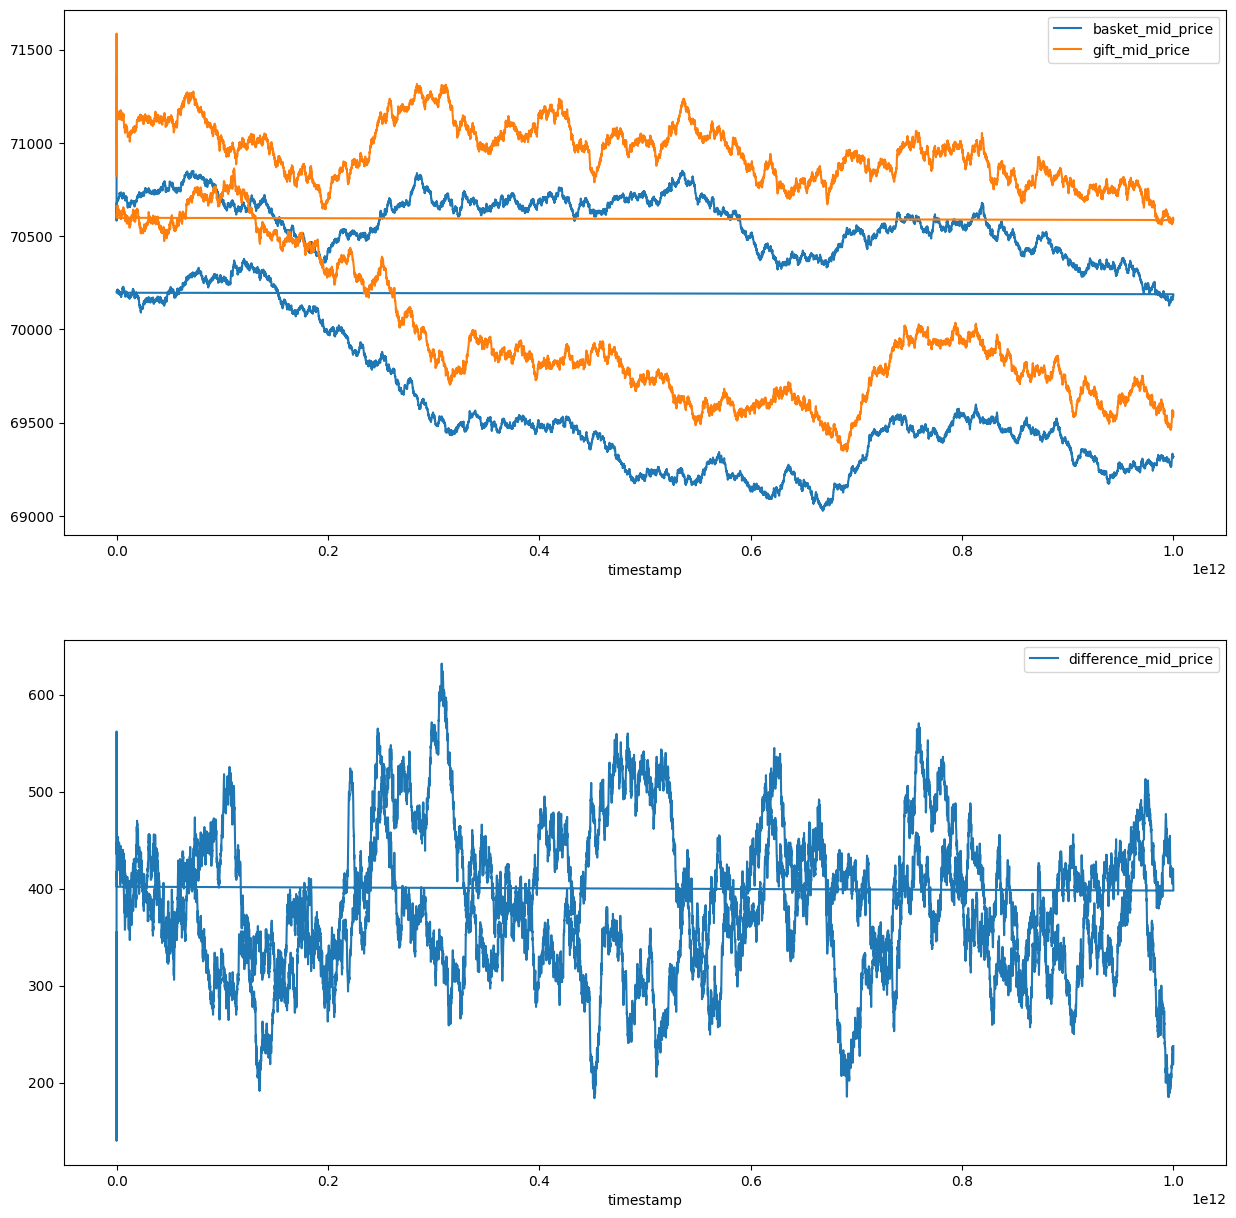

In [2]:
import matplotlib.pyplot as plt

filenames = ["prices_round_3_day_0.csv", "prices_round_3_day_1.csv", "prices_round_3_day_2.csv"]
total_df_3days = []
difference_df_3days = []

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for idx, filename in enumerate(filenames):
    df = df_dict[filename]
    
    choc_df = df[df["product"] == "CHOCOLATE"].reset_index()
    strawberries_df = df[df["product"] == "STRAWBERRIES"].reset_index()
    roses_df = df[df["product"] == "ROSES"].reset_index()

    gift_df = df[df["product"] == "GIFT_BASKET"].reset_index()
    gift_df = gift_df.rename(columns={"mid_price": "gift_mid_price"})

    basket_df = pd.concat([choc_df[["timestamp", "mid_price"]], strawberries_df["mid_price"].rename("strawberries_mid_price"), roses_df["mid_price"].rename("roses_mid_price")], axis=1)
    basket_df = basket_df.rename(columns={"mid_price": "choc_mid_price"})
    basket_df["basket_mid_price"] = 4 * basket_df["choc_mid_price"] + 6 * basket_df["strawberries_mid_price"] + basket_df["roses_mid_price"]
    #print(basket_df)
    #print(gift_df[["timestamp", "mid_price"]])

    total_df = pd.merge(basket_df, gift_df, on="timestamp")
    total_df["difference_mid_price"] = total_df["gift_mid_price"] - total_df["basket_mid_price"]

    if len(total_df_3days) == 0:
        total_df_3days = total_df
    else:
        total_df["timestamp"] = total_df["timestamp"] * 1000000
        total_df_3days = pd.concat([total_df_3days, total_df], ignore_index=True)
    
total_df_3days.plot(x="timestamp", y="basket_mid_price", ax=axes[0])
total_df_3days.plot(x="timestamp", y="gift_mid_price", ax=axes[0])

total_df_3days.plot(x="timestamp", y="difference_mid_price", ax=axes[1])
print(f"Mean of difference: {total_df["difference_mid_price"].mean()}, std of mean of difference:{total_df["difference_mid_price"].std()}")

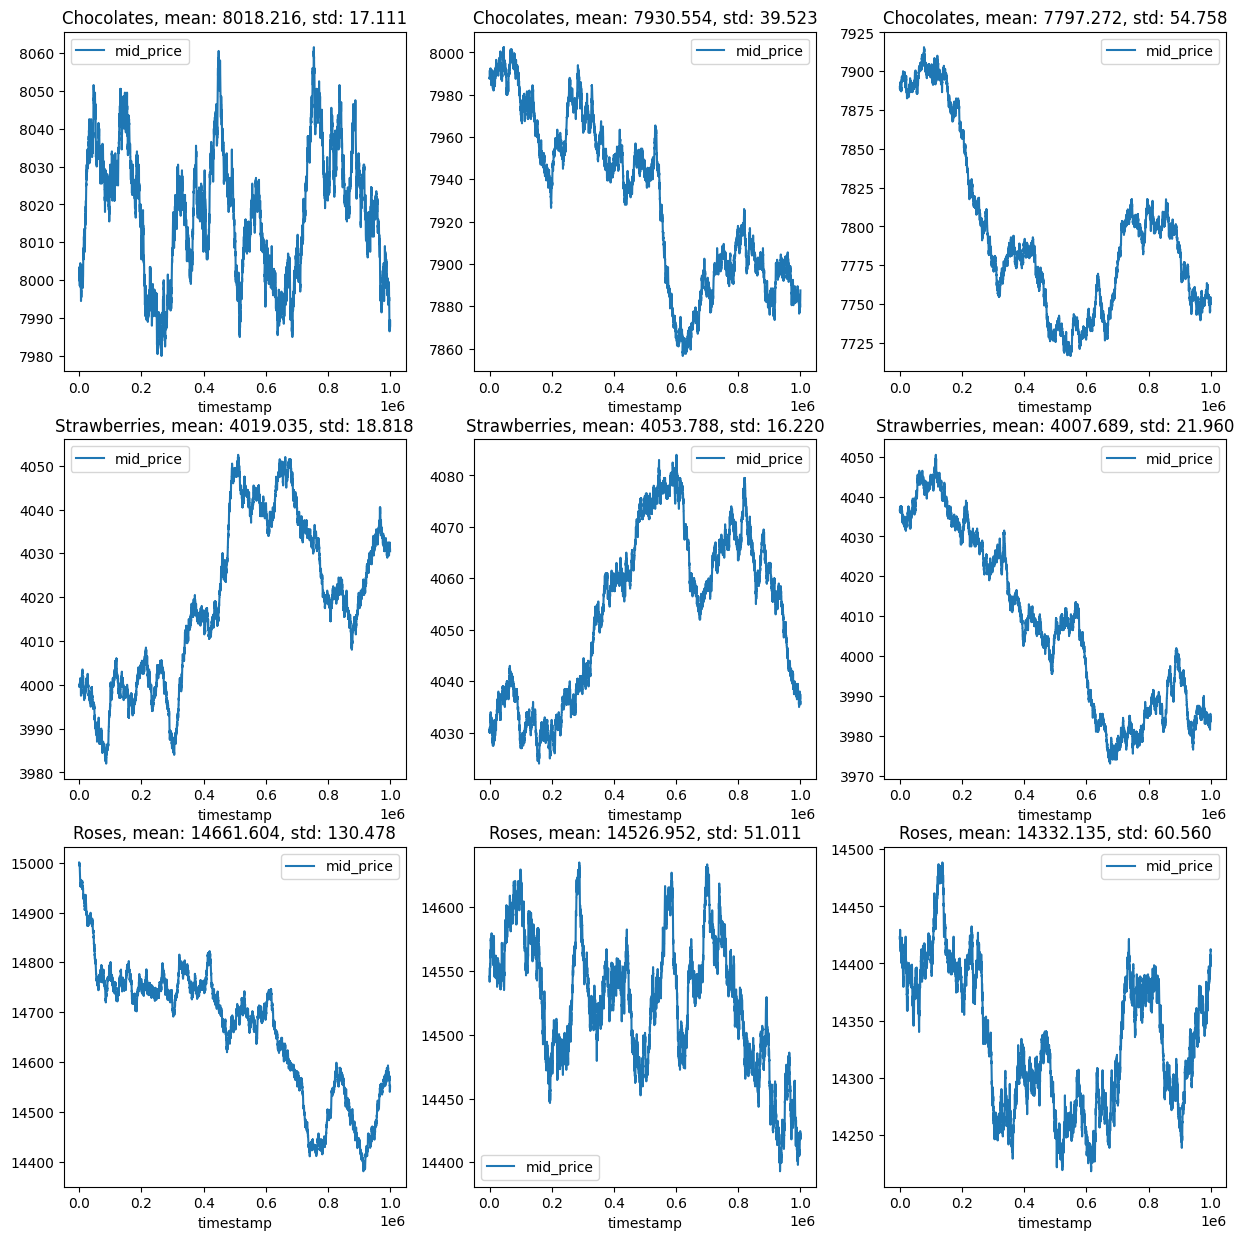

In [7]:
import matplotlib.pyplot as plt

filenames = ["prices_round_3_day_0.csv", "prices_round_3_day_1.csv", "prices_round_3_day_2.csv"]
dfs = []


figs, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for idx, filename in enumerate(filenames):
    df = df_dict[filename]
    
    choc_df = df[df["product"] == "CHOCOLATE"].reset_index()
    strawberries_df = df[df["product"] == "STRAWBERRIES"].reset_index()
    roses_df = df[df["product"] == "ROSES"].reset_index()

    choc_df.plot(x="timestamp", y="mid_price", ax=axes[0, idx], title=f"Chocolates, mean: {choc_df["mid_price"].mean():.3f}, std: {choc_df["mid_price"].std():.3f}")
    strawberries_df.plot(x="timestamp", y="mid_price", ax=axes[1, idx], title=f"Strawberries, mean: {strawberries_df["mid_price"].mean():.3f}, std: {strawberries_df["mid_price"].std():.3f}")
    roses_df.plot(x="timestamp", y="mid_price", ax=axes[2, idx], title=f"Roses, mean: {roses_df["mid_price"].mean():.3f}, std: {roses_df["mid_price"].std():.3f}")